# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

**Forward Selection:** 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

**Backward Elimination:**
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

**Recursive Feature elimination:**
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

## Importing the data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [2]:
banking =  pd.read_csv('Data/bank-full.csv')

In [3]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
banking.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [6]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
banking.shape

(45211, 17)

In [8]:
banking.rename(columns={"y":"Action"},inplace = True)

In [9]:
banking.Action.value_counts()

no     39922
yes     5289
Name: Action, dtype: int64

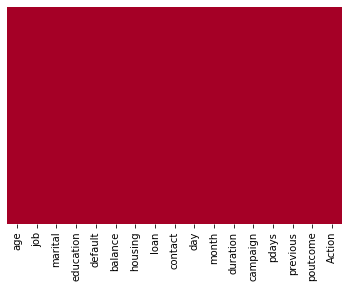

In [10]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [11]:
new_data =  banking.select_dtypes(include='object')

In [12]:
pd.DataFrame(new_data)

,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [13]:
#checking the number of uique categories in each column
for i in new_data.columns:
    print("\n---------------\n")
    print(i,';',len(banking[i].unique()),'labels')
    print("The unique values are: ", banking[i].unique())


---------------

job ; 12 labels
The unique values are:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

---------------

marital ; 3 labels
The unique values are:  ['married' 'single' 'divorced']

---------------

education ; 4 labels
The unique values are:  ['tertiary' 'secondary' 'unknown' 'primary']

---------------

default ; 2 labels
The unique values are:  ['no' 'yes']

---------------

housing ; 2 labels
The unique values are:  ['yes' 'no']

---------------

loan ; 2 labels
The unique values are:  ['no' 'yes']

---------------

contact ; 3 labels
The unique values are:  ['unknown' 'cellular' 'telephone']

---------------

month ; 12 labels
The unique values are:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

---------------

poutcome ; 4 labels
The unique values are:  ['unknown' 'failure' 'other' 'success']

---------------

Action ; 2 labels
The 

### Preprocessing 
**Label Encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [15]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [16]:
banking1.shape

(45211, 17)

## K Best Features

In [17]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [18]:
X = banking1.iloc[:,0:16]
y = banking1['Action']

In [19]:
# Checking the values of X
pd.DataFrame(X)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3


In [20]:
# Checking the values of y
pd.DataFrame(y)

,Action
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [21]:
Kbest = SelectKBest(f_classif, 3)
kfit = Kbest.fit(X, y)

In [22]:
scores = pd.DataFrame({'Scores':kfit.scores_})
columns = pd.DataFrame({'Features':X.columns})

In [23]:
# Checking the values
scores

,Scores
0,28.625233
1,126.572276
2,36.359010
3,8333.761148
4,243.358404
5,490.696563
6,396.443989
7,74.048351
8,94.150026
9,199.242825


In [24]:
# Checking the values
columns

,Features
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous
7,job
8,marital
9,education


## Model

In [25]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
# Train logistic regression model with subset of features from K Best

best_features = pd.concat([columns, scores], axis=1)

# Sorting the values based on scores (Descending)
best_features = best_features.sort_values(by='Scores',ascending=False)
best_features

,Features,Scores
3,duration,8333.761148
13,contact,1017.965930
11,housing,892.950576
5,pdays,490.696563
6,previous,396.443989
15,poutcome,275.596872
4,campaign,243.358404
12,loan,211.167395
9,education,199.242825
1,balance,126.572276


In [27]:
# Selecting the k best features
k=10
X = best_features.iloc[0:k,0]
pd.DataFrame(X)

,Features
3,duration
13,contact
11,housing
5,pdays
6,previous
15,poutcome
4,campaign
12,loan
9,education
1,balance


In [28]:
k_best_features = banking1[X]
k_best_features

,duration,contact,housing,pdays,previous,poutcome,campaign,loan,education,balance
0,261,2,1,-1,0,3,1,0,2,2143
1,151,2,1,-1,0,3,1,0,1,29
2,76,2,1,-1,0,3,1,1,1,2
3,92,2,1,-1,0,3,1,0,3,1506
4,198,2,0,-1,0,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...
45206,977,0,0,-1,0,3,3,0,2,825
45207,456,0,0,-1,0,3,2,0,0,1729
45208,1127,0,0,184,3,2,5,0,1,5715
45209,508,1,0,-1,0,3,4,0,1,668


In [29]:
X_shape = k_best_features.shape
X_type  = type(k_best_features)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'pandas.core.frame.DataFrame'>, Shape-(45211, 10)
y: Type-<class 'pandas.core.series.Series'>, Shape-(45211,)


**Splitting**


In [30]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(k_best_features, y, test_size=0.30, random_state=42)

In [31]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (31647, 10) , y_train: (31647,)
X_test: (13564, 10) , y_test: (13564,)


**Model**

In [32]:
# Initializing
lr = LogisticRegression()

In [33]:
# Fitting
lr.fit(X_train, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Metrices**

In [34]:
#Accuracy on Training and Testing Set
from sklearn.metrics import accuracy_score
print("----------LOGISTIC REGRESSION----------")
y_lr_train=lr.predict(X_train)
print("Accuracy of Training Split :",accuracy_score(y_train,y_lr_train))
y_lr_pred=lr.predict(X_test)
print("Accuracy of Test Split :",accuracy_score(y_test,y_lr_pred))

----------LOGISTIC REGRESSION----------
Accuracy of Training Split : 0.8915537017726799
Accuracy of Test Split : 0.8883810085520495


# Forward Selection

In [35]:
# Train a logistic regression model here
X_forawrd = banking1.iloc[:, :16]
y_forward = banking1['Action']

In [36]:
# Checking the values of X
pd.DataFrame(X_forawrd)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3


In [37]:
# Checking the values of y
pd.DataFrame(y_forward)

,Action
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [38]:
X_shape = X_forawrd.shape
X_type  = type(X_forawrd)
y_shape = y_forward.shape
y_type  = type(y_forward)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'pandas.core.frame.DataFrame'>, Shape-(45211, 16)
y: Type-<class 'pandas.core.series.Series'>, Shape-(45211,)


**Splitting**

In [39]:
# Do train-test split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_forawrd, y_forward, test_size=0.30, random_state=42)

In [40]:
# To check if the data is correctly segregated
X_train_shape = X_train_f.shape
y_train_shape = y_train_f.shape
X_test_shape  = X_test_f.shape
y_test_shape  = y_test_f.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (31647, 16) , y_train: (31647,)
X_test: (13564, 16) , y_test: (13564,)


**Model**

In [41]:
# Initialize
lr_forward = LogisticRegression()

In [42]:
# Fit
lr_forward.fit(X_train_f, y_train_f)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Print the absolute weights of the model and sort them in ascending order

coefficients = pd.DataFrame(lr_forward.coef_)
coefficients = coefficients.T
columns = pd.DataFrame(X_train_f.columns)
feature_scores = pd.concat([columns, coefficients],axis=1)
feature_scores.columns=['Columns','Coefficients']
feature_scores

,Columns,Coefficients
0,age,0.007017
1,balance,0.000016
2,day,-0.005172
3,duration,0.003917
4,campaign,-0.133831
5,pdays,0.003215
6,previous,0.083192
7,job,0.001432
8,marital,0.192523
9,education,0.173618


In [44]:
# Convert into positive values

rows = feature_scores.shape[0]
for g in range(rows):
    if(feature_scores.iloc[g,1]<0):
        feature_scores.iloc[g,1] = -feature_scores.iloc[g,1]
    else:
        continue

feature_scores

,Columns,Coefficients
0,age,0.007017
1,balance,0.000016
2,day,0.005172
3,duration,0.003917
4,campaign,0.133831
5,pdays,0.003215
6,previous,0.083192
7,job,0.001432
8,marital,0.192523
9,education,0.173618


In [45]:
# Sorting them in descending order
feature_scores = feature_scores.sort_values(by='Coefficients',ascending=False)
feature_scores

,Columns,Coefficients
11,housing,1.053744
12,loan,0.716883
13,contact,0.648495
10,default,0.299029
8,marital,0.192523
9,education,0.173618
15,poutcome,0.167776
4,campaign,0.133831
6,previous,0.083192
14,month,0.035591


In [46]:
columns_f = feature_scores.iloc[:,0]
columns_f

11      housing
12         loan
13      contact
10      default
8       marital
9     education
15     poutcome
4      campaign
6      previous
14        month
0           age
2           day
3      duration
5         pdays
7           job
1       balance
Name: Columns, dtype: object

In [47]:
# Now selecting the best features 

fs_features = X_train_f[columns_f]
fs_features_test = X_test_f[columns_f]

In [48]:
# Checking the values
fs_features

,housing,loan,contact,default,marital,education,poutcome,campaign,previous,month,age,day,duration,pdays,job,balance
10747,0,0,2,0,2,2,3,4,0,6,36,17,153,-1,9,0
26054,0,0,0,0,1,1,3,3,0,9,56,19,312,-1,2,196
9125,1,0,2,0,1,1,3,2,0,6,46,5,83,-1,1,0
41659,0,0,0,0,0,2,2,1,5,10,41,1,302,119,4,3426
4443,1,0,2,0,1,1,3,1,0,8,38,20,90,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,2,0,2,0,3,1,0,6,44,18,2093,-1,3,1059
44732,0,0,0,0,2,2,0,1,1,11,23,8,210,92,8,508
38158,1,0,0,0,0,2,3,1,0,8,34,15,239,-1,9,1317
860,0,0,2,0,1,1,3,1,0,8,33,7,111,-1,5,165


In [49]:
# Checking the values 
fs_features_test

,housing,loan,contact,default,marital,education,poutcome,campaign,previous,month,age,day,duration,pdays,job,balance
3776,1,0,2,0,1,1,3,1,0,8,40,16,192,-1,1,580
9928,0,0,2,0,2,1,3,2,0,6,47,9,83,-1,7,3644
33409,1,0,0,0,2,2,3,1,0,0,25,20,226,-1,8,538
31885,0,0,0,0,1,2,0,1,1,0,42,9,311,336,4,1773
15738,0,1,0,0,1,2,3,2,0,5,56,21,121,-1,4,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,0,0,2,0,2,2,3,1,0,6,46,5,47,-1,9,2800
380,1,0,2,0,1,1,3,1,0,8,38,6,133,-1,1,757
7713,0,0,2,0,1,1,3,3,0,8,41,30,298,-1,0,4539
12188,0,0,2,0,1,1,3,4,0,6,41,20,28,-1,8,1309


**Looping**

In [50]:
# Run a for loop where each time you train a new model by adding features (from no of features 1 to n) 
# with highest weights (based on absolute weight from initial model)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [51]:
training_accuracy_f=[]
testing_accuracy_f=[]

rows, columns = fs_features.shape

print(columns)

for m in range(1,columns+1):
    # Selecting m number of features
    Add_Features=fs_features.iloc[:,:m]
    
    # Defining the model
    lr_f=LogisticRegression()
    lr_f.fit(Add_Features,y_train_f)
    
    # Getting the testing and training accuracies for different models
    # Training
    y_lr_train_f = lr_f.predict(Add_Features)
    training_accuracy_f.append(accuracy_score(y_train_f,y_lr_train_f))
    
    # Testing
    y_lr_pred_f = lr_f.predict(fs_features_test.iloc[:,:m])
    testing_accuracy_f.append(accuracy_score(y_test_f,y_lr_pred_f))

16


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

**Metrices**

In [52]:
# Print the accuracies of all the models trained and names of the features used for each time
for m in range(1,columns+1):
    Add_Features = fs_features.iloc[:,:m]
    print(f"\n---------Iteration {m}-------------\n")
    print()
    print("Column Names", Add_Features.columns)
    print("Training Accuracy",training_accuracy_f[m-1])
    print("Testing Accuracy",testing_accuracy_f[m-1])
    print("\n-----\n")


---------Iteration 1-------------


Column Names Index(['housing'], dtype='object')
Training Accuracy 0.8833696716908396
Testing Accuracy 0.8821881450899439

-----


---------Iteration 2-------------


Column Names Index(['housing', 'loan'], dtype='object')
Training Accuracy 0.8833696716908396
Testing Accuracy 0.8821881450899439

-----


---------Iteration 3-------------


Column Names Index(['housing', 'loan', 'contact'], dtype='object')
Training Accuracy 0.8833696716908396
Testing Accuracy 0.8821881450899439

-----


---------Iteration 4-------------


Column Names Index(['housing', 'loan', 'contact', 'default'], dtype='object')
Training Accuracy 0.8833696716908396
Testing Accuracy 0.8821881450899439

-----


---------Iteration 5-------------


Column Names Index(['housing', 'loan', 'contact', 'default', 'marital'], dtype='object')
Training Accuracy 0.8833696716908396
Testing Accuracy 0.8821881450899439

-----


---------Iteration 6-------------


Column Names Index(['housing', 'loa

# Backward Elimination

In [53]:
# Train a logistic regression model here
X_back = banking1.iloc[:,0:16]
y_back = banking1['Action']

In [54]:
# Checking the values
X_back

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3


In [55]:
# Checking the values
y_back

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Action, Length: 45211, dtype: int32

In [56]:
X_shape = X_back.shape
X_type  = type(X_back)
y_shape = y_back.shape
y_type  = type(y_back)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'pandas.core.frame.DataFrame'>, Shape-(45211, 16)
y: Type-<class 'pandas.core.series.Series'>, Shape-(45211,)


**Splitting**

In [57]:
# Train a logistic regression model here
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_back, y_back, test_size=0.30,random_state=42)

In [58]:
# To check if the data is correctly segregated
X_train_shape = X_train_b.shape
y_train_shape = y_train_b.shape
X_test_shape  = X_test_b.shape
y_test_shape  = y_test_b.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (31647, 16) , y_train: (31647,)
X_test: (13564, 16) , y_test: (13564,)


**Model**

In [59]:
# Initializing the model
lr_back = LogisticRegression()

In [60]:
# Fitting
lr_back.fit(X_train_b, y_train_b)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
print(lr_back.coef_)

[[ 7.01681859e-03  1.55829432e-05 -5.17206070e-03  3.91687005e-03
  -1.33830685e-01  3.21474262e-03  8.31915747e-02  1.43151211e-03
   1.92523213e-01  1.73618022e-01 -2.99029452e-01 -1.05374401e+00
  -7.16883407e-01 -6.48495109e-01  3.55908737e-02  1.67776069e-01]]


In [62]:
# Print the absolute weights of the model and sort them in ascending order
weights= []
for i in lr_back.coef_[0]:
    print(i)
    weights.append(abs(i))

0.00701681859018434
1.5582943246543228e-05
-0.0051720606992449285
0.0039168700533183465
-0.13383068530686756
0.0032147426194795766
0.08319157465306909
0.001431512106602467
0.19252321337285058
0.17361802179511449
-0.2990294516901877
-1.0537440138596206
-0.7168834073779988
-0.6484951089613733
0.03559087373979043
0.16777606863566105


In [63]:
weights_dic = {}

for i in range (len(X_back.columns)):
    weights_dic[X_back.columns[i]]=weights[i]

weights_dic

{'age': 0.00701681859018434,
 'balance': 1.5582943246543228e-05,
 'day': 0.0051720606992449285,
 'duration': 0.0039168700533183465,
 'campaign': 0.13383068530686756,
 'pdays': 0.0032147426194795766,
 'previous': 0.08319157465306909,
 'job': 0.001431512106602467,
 'marital': 0.19252321337285058,
 'education': 0.17361802179511449,
 'default': 0.2990294516901877,
 'housing': 1.0537440138596206,
 'loan': 0.7168834073779988,
 'contact': 0.6484951089613733,
 'month': 0.03559087373979043,
 'poutcome': 0.16777606863566105}

In [64]:
fin = sorted(weights_dic.items(), key=lambda x: x[1])
fin

[('balance', 1.5582943246543228e-05),
 ('job', 0.001431512106602467),
 ('pdays', 0.0032147426194795766),
 ('duration', 0.0039168700533183465),
 ('day', 0.0051720606992449285),
 ('age', 0.00701681859018434),
 ('month', 0.03559087373979043),
 ('previous', 0.08319157465306909),
 ('campaign', 0.13383068530686756),
 ('poutcome', 0.16777606863566105),
 ('education', 0.17361802179511449),
 ('marital', 0.19252321337285058),
 ('default', 0.2990294516901877),
 ('contact', 0.6484951089613733),
 ('loan', 0.7168834073779988),
 ('housing', 1.0537440138596206)]

In [65]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 

feature_subset=[]
accuracy_test=[]
accuracy_train=[]

for i in range(0,len(fin)):
    features=[]
    
    for j in range(i,len(fin)):
        features.append(fin[j][0])
        
    feature_subset.append(features) 
    
    X_present=X_back[features] 
    
    X_train, X_test, y_train, y_test = train_test_split(X_present, y_back, test_size=0.33,random_state=42)
    print(X_train.shape)
    
    logistic=LogisticRegression()
    logistic.fit(X_train,y_train)
    res_y=logistic.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, res_y))
    res_y=logistic.predict(X_train)    
    accuracy_train.append(accuracy_score(y_train, res_y))

(30291, 16)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 15)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 14)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 13)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 12)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 11)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 10)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 9)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 8)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 7)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 6)
(30291, 5)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 4)
(30291, 3)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(30291, 2)
(30291, 1)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
# Print the accuracies of all the models trained and names of the features used for each time
print("No Of Features","\t","Test Accuracy","\t\t\t","Train Accuracy")
for i in range (len(feature_subset)):
    print(len(feature_subset[i]),"\t\t",accuracy_test[i],"\t\t",accuracy_train[i])

No Of Features 	 Test Accuracy 			 Train Accuracy
16 		 0.8903485254691689 		 0.8912218150605791
15 		 0.8902144772117963 		 0.8917170116536265
14 		 0.8899463806970509 		 0.8916509854412201
13 		 0.8884048257372654 		 0.8905615529365158
12 		 0.882171581769437 		 0.8825723812353504
11 		 0.8821045576407507 		 0.882473341916741
10 		 0.882171581769437 		 0.8824073157043346
9 		 0.8820375335120644 		 0.8823743025981314
8 		 0.8830428954423593 		 0.8830015516159916
7 		 0.8830428954423593 		 0.8830015516159916
6 		 0.8830428954423593 		 0.8830015516159916
5 		 0.8830428954423593 		 0.8830015516159916
4 		 0.8830428954423593 		 0.8830015516159916
3 		 0.8830428954423593 		 0.8830015516159916
2 		 0.8830428954423593 		 0.8830015516159916
1 		 0.8830428954423593 		 0.8830015516159916


# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [67]:
X = banking1.iloc[:,0:16]
y = banking1.iloc[:,16]
logit = LogisticRegression()

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [69]:
rfe = RFE(estimator=logit, step=1)
rfe = rfe.fit(X_train, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [70]:
cols = pd.DataFrame(X.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [71]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [72]:
rankings_of_features

,0,0
0,age,5
1,balance,9
2,day,3
3,duration,7
4,campaign,1
5,pdays,8
6,previous,1
7,job,6
8,marital,1
9,education,1


In [73]:
rankings_of_features.columns = ['head', 'rank']

In [74]:
rankings_of_features

,head,rank
0,age,5
1,balance,9
2,day,3
3,duration,7
4,campaign,1
5,pdays,8
6,previous,1
7,job,6
8,marital,1
9,education,1


In [75]:
print(rankings_of_features.nlargest(5,'rank'))
#remember this gives wrong results

       head  rank
1   balance     9
5     pdays     8
3  duration     7
7       job     6
0       age     5


In [76]:
rankings_of_features.sort_values(by='rank')

,head,rank
4,campaign,1
6,previous,1
8,marital,1
9,education,1
10,default,1
11,housing,1
12,loan,1
13,contact,1
14,month,2
2,day,3


In [77]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [78]:
model = logit.fit(X_trainRFE, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [80]:
logit.predict(X_testRFE)

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
score = logit.score(X_testRFE, y_test)
print(score)

0.8841049837805957


# RFE using cross validation

In [82]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_trainRFE, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [83]:
rfecv.grid_scores_

array([0.88210573, 0.88210573, 0.88210573, 0.88210573, 0.88210573,
       0.88210573, 0.88210573, 0.88141059])

In [84]:
X_train_rfecv = rfecv.transform(X_trainRFE)
X_test_rfecv = rfecv.transform(X_testRFE)

In [85]:
model = logit.fit(X_train_rfecv, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
y_pred = logit.predict(X_test_rfecv)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
logit.score(X_test_rfecv, y_test)
print(score)

0.8841049837805957
